### Adaptive time steps (variable time resolution) for reaction `A <-> B`,
with 1st-order kinetics in both directions, taken to equilibrium.

This is a repeat of the experiment _"react_2_a"_ , but with **adaptive variable time steps** 
and the use of **diagnostic tools** for insight into the details of the simulation.  

**Background**: please see experiment `react_2_a` 

In [1]:
LAST_REVISED = "Sep. 8, 2024"
LIFE123_VERSION = "1.0.0.beta.38"    # Version this experiment is based on

In [2]:
#import set_path              # Using MyBinder?  Uncomment this before running the next cell!

In [3]:
#import sys
#sys.path.append("C:/some_path/my_env_or_install")   # CHANGE to the folder containing your venv or libraries installation!
# NOTE: If any of the imports below can't find a module, uncomment the lines above, or try:  import set_path   

import ipynbname

from life123 import check_version, UniformCompartment, GraphicLog, PlotlyHelper

In [4]:
check_version(LIFE123_VERSION)

OK


In [5]:
# Initialize the HTML logging (for the graphics)
log_file = ipynbname.name() + ".log.htm"    # Use the notebook base filename for the log file
                                            # IN CASE OF PROBLEMS, set manually to any desired name

# Set up the use of some specified graphic (Vue) components
GraphicLog.config(filename=log_file,
                  components=["vue_cytoscape_2"],
                  extra_js="https://cdnjs.cloudflare.com/ajax/libs/cytoscape/3.21.2/cytoscape.umd.js")

-> Output will be LOGGED into the file 'react_2_b.log.htm'


# PART 1 - RUN THE SIMULATION

### Initialize the System

In [6]:
# Instantiate the simulator and specify the chemicals
dynamics = UniformCompartment(names=["A", "B"], preset="mid")

# Reaction A <-> B , with 1st-order kinetics in both directions
dynamics.add_reaction(reactants="A", products="B", 
                       forward_rate=3., reverse_rate=2.)

dynamics.describe_reactions()

Number of reactions: 1 (at temp. 25 C)
0: A <-> B  (kF = 3 / kR = 2 / delta_G = -1,005.1 / K = 1.5) | 1st order in all reactants & products
Set of chemicals involved in the above reactions: {'A', 'B'}


In [7]:
# Send a plot of the network of reactions to the HTML log file
dynamics.plot_reaction_network("vue_cytoscape_2")

[GRAPHIC ELEMENT SENT TO LOG FILE `react_2_b.log.htm`]


In [8]:
# Set the initial concentrations of all the chemicals, in their index order
dynamics.set_conc([10., 50.])

dynamics.describe_state()

SYSTEM STATE at Time t = 0:
2 species:
  Species 0 (A). Conc: 10.0
  Species 1 (B). Conc: 50.0
Set of chemicals involved in reactions: {'A', 'B'}


In [9]:
dynamics.get_history()

SYSTEM TIME     A     B            caption
0          0.0  10.0  50.0  Initialized state

In [10]:
dynamics.enable_diagnostics()   # To save diagnostic information about the call to single_compartment_react()
                                # Useful for insight into the inner workings of the simulation

In [11]:
# For experiment repeatability, we specified, when instantiating the "UniformCompartment" class, 
# a particular preset applicable to the adaptive time steps; 
# that preset assigned the following values
dynamics.adaptive_steps.show_adaptive_parameters() 

Parameters used for the automated adaptive time step sizes -
    THRESHOLDS:  [{'norm': 'norm_A', 'low': 0.5, 'high': 0.8, 'abort': 1.44}, {'norm': 'norm_B', 'low': 0.08, 'high': 0.5, 'abort': 1.5}]
    STEP FACTORS:  {'upshift': 1.2, 'downshift': 0.5, 'abort': 0.4, 'error': 0.25}


## Run the reaction   
#### Passing True to _variable_steps_ automatically adjusts up or down the time steps

In [12]:
dynamics.single_compartment_react(initial_step=0.1, target_end_time=1.2,
                                  variable_steps=True,
                                  snapshots={"initial_caption": "1st reaction step",
                                             "final_caption": "last reaction step"}
                                  )

Some steps were backtracked and re-done, to prevent negative concentrations or excessively large concentration changes
19 total step(s) taken
Number of step re-do's because of elective soft aborts: 2
Norm usage: {'norm_A': 17, 'norm_B': 15, 'norm_C': 15, 'norm_D': 15}


In [13]:
history = dynamics.get_history()   # The system's history, saved during the run of single_compartment_react()
history

SYSTEM TIME          A          B             caption
0      0.000000  10.000000  50.000000   Initialized state
1      0.016000  11.120000  48.880000   1st reaction step
2      0.032000  12.150400  47.849600                    
3      0.048000  13.098368  46.901632                    
4      0.067200  14.144925  45.855075                    
5      0.086400  15.091012  44.908988                    
6      0.109440  16.117327  43.882673                    
7      0.132480  17.025411  42.974589                    
8      0.160128  17.989578  42.010422                    
9      0.193306  18.986635  41.013365                    
10     0.233119  19.984624  40.015376                    
11     0.280894  20.943812  39.056188                    
12     0.338225  21.819882  38.180118                    
13     0.407022  22.569810  37.430190                    
14     0.489579  23.160168  36.839832                    
15     0.588647  23.576169  36.423831                    
16     0.707528  23.828097  36.171903                    
17     0.850186  23.950713  36.049287                    
18     1.021375  23.992900  36.007100                    
19     1.226802  24.000193  35.999807  last reaction step

## Notice how the reaction proceeds in smaller steps in the early times, when [A] and [B] are changing much more rapidly
#### That resulted from passing the flag _variable_steps=True_ to single_compartment_react()

In [14]:
# Verify that the reaction has reached equilibrium
dynamics.is_in_equilibrium()

0: A <-> B
Final concentrations: [A] = 24 ; [B] = 36
1. Ratio of reactant/product concentrations, adjusted for reaction orders: 1.49998
    Formula used:  [B] / [A]
2. Ratio of forward/reverse reaction rates: 1.5
Discrepancy between the two values: 0.001338 %
Reaction IS in equilibrium (within 1% tolerance)



True

# PART 2 - Visualize the Results

### Plots of changes of concentration with time

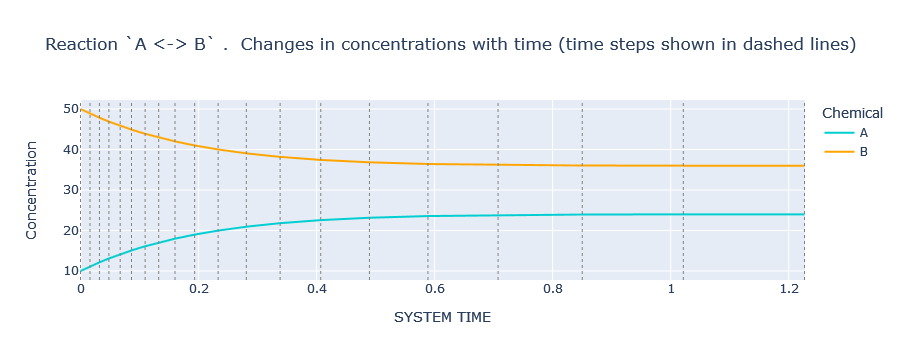

In [15]:
dynamics.plot_history(colors=['darkturquoise', 'orange'], show_intervals=True)

## Note how the left-hand side of this plot is much smoother than it was in experiment `react_2_a`, where no adaptive time steps were used!

#### Compare the above with the fixed step sizes of experiment `react_2_a`    
To see the sizes of the steps taken:

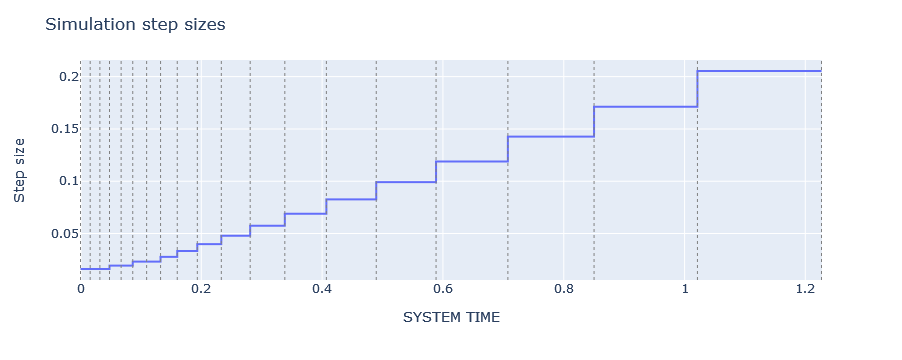

In [16]:
dynamics.plot_step_sizes(show_intervals=True)

# PART 2 - Scrutinizing the inner workings of the step-size changes

NOTE: this part is NOT meant for typically end users.  It's for debugging, and for anyone interested in taking an "under the hood" look

In [17]:
diagnostics = dynamics.diagnostics      # Available because we turned on diagnostics

The "Diagnostics" object contains a treasure trove of data and methods yo get insights into the inner workings of the simulation.   
Diagnostic data was saved because of the call to `enable_diagnostics()` prior to running the reaction

In [18]:
type(diagnostics)

life123.diagnostics.Diagnostics

In [19]:
# Let's revisit the variables steps taken
dynamics.diagnostics.explain_time_advance()

From time 0 to 0.048, in 3 steps of 0.016
From time 0.048 to 0.0864, in 2 steps of 0.0192
From time 0.0864 to 0.1325, in 2 steps of 0.023
From time 0.1325 to 0.1601, in 1 step of 0.0276
From time 0.1601 to 0.1933, in 1 step of 0.0332
From time 0.1933 to 0.2331, in 1 step of 0.0398
From time 0.2331 to 0.2809, in 1 step of 0.0478
From time 0.2809 to 0.3382, in 1 step of 0.0573
From time 0.3382 to 0.407, in 1 step of 0.0688
From time 0.407 to 0.4896, in 1 step of 0.0826
From time 0.4896 to 0.5886, in 1 step of 0.0991
From time 0.5886 to 0.7075, in 1 step of 0.119
From time 0.7075 to 0.8502, in 1 step of 0.143
From time 0.8502 to 1.021, in 1 step of 0.171
From time 1.021 to 1.227, in 1 step of 0.205
(19 steps total)


#### The Delta-concentration values for all the individual reaction time steps, as contribued by a single reaction, may be inspected from the diagnostic data:

In [20]:
diagnostics.get_diagnostic_rxn_data(rxn_index=0)    # For the 0-th reaction (the only reaction in our case)

Reaction:  A <-> B


START_TIME  time_step   Delta A   Delta B       rate  \
0     0.000000   0.100000  7.000000 -7.000000 -70.000000   
1     0.000000   0.040000  2.800000 -2.800000 -70.000000   
2     0.000000   0.016000  1.120000 -1.120000 -70.000000   
3     0.016000   0.016000  1.030400 -1.030400 -64.400000   
4     0.032000   0.016000  0.947968 -0.947968 -59.248000   
5     0.048000   0.019200  1.046557 -1.046557 -54.508160   
6     0.067200   0.019200  0.946087 -0.946087 -49.275377   
7     0.086400   0.023040  1.026315 -1.026315 -44.544940   
8     0.109440   0.023040  0.908084 -0.908084 -39.413363   
9     0.132480   0.027648  0.964167 -0.964167 -34.872944   
10    0.160128   0.033178  0.997057 -0.997057 -30.052108   
11    0.193306   0.039813  0.997988 -0.997988 -25.066824   
12    0.233119   0.047776  0.959188 -0.959188 -20.076882   
13    0.280894   0.057331  0.876070 -0.876070 -15.280942   
14    0.338225   0.068797  0.749929 -0.749929 -10.900592   
15    0.407022   0.082556  0.590357 -0.590357  -7.150948   
16    0.489579   0.099068  0.416002 -0.416002  -4.199162   
17    0.588647   0.118881  0.251928 -0.251928  -2.119154   
18    0.707528   0.142658  0.122616 -0.122616  -0.859515   
19    0.850186   0.171189  0.042187 -0.042187  -0.246433   
20    1.021375   0.205427  0.007293 -0.007293  -0.035500   

                             caption  
0   aborted: excessive norm value(s)  
1   aborted: excessive norm value(s)  
2                                     
3                                     
4                                     
5                                     
6                                     
7                                     
8                                     
9                                     
10                                    
11                                    
12                                    
13                                    
14                                    
15                                    
16                                    
17                                    
18                                    
19                                    
20

### Note that diagnostic data with the DELTA Concentrations - in the above listing - also records the values that were considered (but not actually used) during *ABORTED* steps.  For example, in steps 0-2, above, the START_TIME remains the same, as the time_step gets progressively reduced until the resulting changes are deemed acceptable.

Line 2, above, shows that the concentration of the product [B], which was set by us to an initial value of 50, gets affected by a **rate of change of -70**, sustained over a delta_time of 0.016 .  
The reaction rate is negative because _the product is decreasing._  
The new value for [B] is:  

In [21]:
50. - 70. * 0.016

48.88

That's indeed the value we saw in the history of the product [B] at time t=0.016 :

In [22]:
dynamics.get_history(t=0.016)

search_value  SYSTEM TIME      A      B            caption
1         0.016        0.016  11.12  48.88  1st reaction step

In the examples below, we'll re-compute Delta values for individual steps, directly from the system history.

### Example 1: **very early in the run**    

In [23]:
history[1:4]

SYSTEM TIME          A          B            caption
1        0.016  11.120000  48.880000  1st reaction step
2        0.032  12.150400  47.849600                   
3        0.048  13.098368  46.901632

In [24]:
delta_concentrations = dynamics.extract_delta_concentrations(history, 1, 2, ['A', 'B'])
delta_concentrations

array([ 1.0304, -1.0304], dtype=float32)

As expected by the 1:1 stoichiometry, delta_A = - delta_B

In [25]:
# Get all the concentrations at the start of the above steps
baseline_conc = dynamics.get_historical_concentrations(row=1)
#dynamics.get_historical_concentrations(t=0.016)   # Alternate way
baseline_conc

array([11.12, 48.88], dtype=float32)

In [26]:
# Computes some measures of how large delta_concentrations is, and propose a course of action
dynamics.adaptive_steps.adjust_timestep(delta_conc=delta_concentrations, baseline_conc=baseline_conc,
                                        n_chems=2, indexes_of_active_chemicals=dynamics.chem_data.indexes_of_active_chemicals())  

{'action': 'stay',
 'step_factor': 1,
 'norms': {'norm_A': 0.5308620929718018, 'norm_B': 0.09266187},
 'applicable_norms': 'ALL'}

#### The above analysis indicates that the time step is just about right, and the simulations should STAY on that course : that's based on the shown computed norms (indicating the extent of the change taking place.)  
Indeed, the simulator maintains the same time step :

In [27]:
original_step = history["SYSTEM TIME"][2] - history["SYSTEM TIME"][1]
original_step

0.016000000000000004

In [28]:
next_step = history["SYSTEM TIME"][3] - history["SYSTEM TIME"][2]
next_step

0.016000000000000007

In [29]:
next_step / original_step

1.0000000000000002

### Example 2: **very late in the run**    

In [30]:
history[17:20]

SYSTEM TIME          A          B             caption
17     0.850186  23.950713  36.049287                    
18     1.021375  23.992900  36.007100                    
19     1.226802  24.000193  35.999807  last reaction step

In [31]:
delta_concentrations = dynamics.extract_delta_concentrations(history, 17, 18, ['A', 'B'])
delta_concentrations

array([ 0.04218667, -0.04218667], dtype=float32)

#### Notice the far less change now that the system is approaching equilibrium

In [32]:
# Get all the concentrations at the start of the above steps
baseline_conc = dynamics.get_historical_concentrations(row=17)
#dynamics.get_historical_concentrations(t=0.850186)   # Alternate way
baseline_conc

array([23.950714, 36.049286], dtype=float32)

In [33]:
# Computes a measure of how large delta_concentrations is, and propose a course of action
dynamics.adaptive_steps.adjust_timestep(delta_conc=delta_concentrations, baseline_conc=baseline_conc,
                                        n_chems=2, indexes_of_active_chemicals=dynamics.chem_data.indexes_of_active_chemicals())  

{'action': 'low',
 'step_factor': 1.2,
 'norms': {'norm_A': 0.0008898575906641781, 'norm_B': 0.0017613951},
 'applicable_norms': 'ALL'}

#### The above analysis indicates that the time step is on the "LOW" side, and the simulations should increase it by a factor 1.2 : again, that's based on the shown computed norms (indicating the extent of the change taking place.)  
Indeed, the simulator increases the time step x1.2:

In [34]:
original_step = history["SYSTEM TIME"][18] - history["SYSTEM TIME"][17]
original_step

0.17118912860651525

In [35]:
next_step = history["SYSTEM TIME"][19] - history["SYSTEM TIME"][18]
next_step

0.2054269543278182

In [36]:
next_step / original_step

1.1999999999999995

Where does that x1.2 factor come from?  It's one of the parameters that we passed to the simulator; they can be seen as follows:

In [37]:
dynamics.adaptive_steps.show_adaptive_parameters()

Parameters used for the automated adaptive time step sizes -
    THRESHOLDS:  [{'norm': 'norm_A', 'low': 0.5, 'high': 0.8, 'abort': 1.44}, {'norm': 'norm_B', 'low': 0.08, 'high': 0.5, 'abort': 1.5}]
    STEP FACTORS:  {'upshift': 1.2, 'downshift': 0.5, 'abort': 0.4, 'error': 0.25}


**1.2** is stored as the "step factor" (for the time steps to take) in case an _'upshift'_ (in step size) is the decided course of action

## Diagnostics of the run may be investigated as follows:  
_(note - this is possible because we make a call to set_diagnostics() prior to running the simulation)_

In [38]:
diagnostics.get_diagnostic_conc_data()   # This will be complete, even if we only saved part of the history during the run

TIME          A          B caption
0   0.000000  10.000000  50.000000        
1   0.016000  11.120000  48.880000        
2   0.032000  12.150400  47.849600        
3   0.048000  13.098368  46.901632        
4   0.067200  14.144925  45.855075        
5   0.086400  15.091012  44.908988        
6   0.109440  16.117327  43.882673        
7   0.132480  17.025411  42.974589        
8   0.160128  17.989578  42.010422        
9   0.193306  18.986635  41.013365        
10  0.233119  19.984624  40.015376        
11  0.280894  20.943812  39.056188        
12  0.338225  21.819882  38.180118        
13  0.407022  22.569810  37.430190        
14  0.489579  23.160168  36.839832        
15  0.588647  23.576169  36.423831        
16  0.707528  23.828097  36.171903        
17  0.850186  23.950713  36.049287        
18  1.021375  23.992900  36.007100        
19  1.226802  24.000193  35.999807

In [39]:
diagnostics.get_diagnostic_decisions_data()

START_TIME   Delta A   Delta B     norm_A    norm_B norm_C norm_D  \
0     0.000000  7.000000 -7.000000  24.500000       NaN   None   None   
1     0.000000  2.800000 -2.800000   3.920000       NaN   None   None   
2     0.000000  1.120000 -1.120000   0.627200  0.112000   None   None   
3     0.016000  1.030400 -1.030400   0.530862  0.092662   None   None   
4     0.032000  0.947968 -0.947968   0.449322  0.078019   None   None   
5     0.048000  1.046557 -1.046557   0.547640  0.079900   None   None   
6     0.067200  0.946087 -0.946087   0.447541  0.066885   None   None   
7     0.086400  1.026315 -1.026315   0.526662  0.068008   None   None   
8     0.109440  0.908084 -0.908084   0.412308  0.056342   None   None   
9     0.132480  0.964167 -0.964167   0.464809  0.056631   None   None   
10    0.160128  0.997057 -0.997057   0.497061  0.055424   None   None   
11    0.193306  0.997988 -0.997988   0.497990  0.052563   None   None   
12    0.233119  0.959188 -0.959188   0.460021  0.047996   None   None   
13    0.280894  0.876070 -0.876070   0.383749  0.041830   None   None   
14    0.338225  0.749929 -0.749929   0.281197  0.034369   None   None   
15    0.407022  0.590357 -0.590357   0.174261  0.026157   None   None   
16    0.489579  0.416002 -0.416002   0.086529  0.017962   None   None   
17    0.588647  0.251928 -0.251928   0.031734  0.010686   None   None   
18    0.707528  0.122616 -0.122616   0.007517  0.005146   None   None   
19    0.850186  0.042187 -0.042187   0.000890  0.001761   None   None   
20    1.021375  0.007293 -0.007293   0.000027  0.000304   None   None   

       action  step_factor  time_step                  caption  
0       ABORT          0.4   0.100000  excessive norm value(s)  
1       ABORT          0.4   0.040000  excessive norm value(s)  
2   OK (stay)          1.0   0.016000                           
3   OK (stay)          1.0   0.016000                           
4    OK (low)          1.2   0.016000                           
5   OK (stay)          1.0   0.019200                           
6    OK (low)          1.2   0.019200                           
7   OK (stay)          1.0   0.023040                           
8    OK (low)          1.2   0.023040                           
9    OK (low)          1.2   0.027648                           
10   OK (low)          1.2   0.033178                           
11   OK (low)          1.2   0.039813                           
12   OK (low)          1.2   0.047776                           
13   OK (low)          1.2   0.057331                           
14   OK (low)          1.2   0.068797                           
15   OK (low)          1.2   0.082556                           
16   OK (low)          1.2   0.099068                           
17   OK (low)          1.2   0.118881                           
18   OK (low)          1.2   0.142658                           
19   OK (low)          1.2   0.171189                           
20   OK (low)          1.2   0.205427

# PART 3 - Investigate A_dot, i.e. d[A]/dt

In experiment `react_2_a`, the time derivative (rate of change) of [A] was obtained by numeric differentiation of [A](t), i.e. the time values of [A]  
  
But no need for that!  **The rates (at every time step) of each reaction are automatically stored with the diagnostics data, whenever diagnostics data is saved** :)  

Let's again look at the table for reaction 0 :

In [40]:
df = diagnostics.get_diagnostic_rxn_data(rxn_index=0)    # For the 0-th reaction (the only reaction in our case)
df

Reaction:  A <-> B


START_TIME  time_step   Delta A   Delta B       rate  \
0     0.000000   0.100000  7.000000 -7.000000 -70.000000   
1     0.000000   0.040000  2.800000 -2.800000 -70.000000   
2     0.000000   0.016000  1.120000 -1.120000 -70.000000   
3     0.016000   0.016000  1.030400 -1.030400 -64.400000   
4     0.032000   0.016000  0.947968 -0.947968 -59.248000   
5     0.048000   0.019200  1.046557 -1.046557 -54.508160   
6     0.067200   0.019200  0.946087 -0.946087 -49.275377   
7     0.086400   0.023040  1.026315 -1.026315 -44.544940   
8     0.109440   0.023040  0.908084 -0.908084 -39.413363   
9     0.132480   0.027648  0.964167 -0.964167 -34.872944   
10    0.160128   0.033178  0.997057 -0.997057 -30.052108   
11    0.193306   0.039813  0.997988 -0.997988 -25.066824   
12    0.233119   0.047776  0.959188 -0.959188 -20.076882   
13    0.280894   0.057331  0.876070 -0.876070 -15.280942   
14    0.338225   0.068797  0.749929 -0.749929 -10.900592   
15    0.407022   0.082556  0.590357 -0.590357  -7.150948   
16    0.489579   0.099068  0.416002 -0.416002  -4.199162   
17    0.588647   0.118881  0.251928 -0.251928  -2.119154   
18    0.707528   0.142658  0.122616 -0.122616  -0.859515   
19    0.850186   0.171189  0.042187 -0.042187  -0.246433   
20    1.021375   0.205427  0.007293 -0.007293  -0.035500   

                             caption  
0   aborted: excessive norm value(s)  
1   aborted: excessive norm value(s)  
2                                     
3                                     
4                                     
5                                     
6                                     
7                                     
8                                     
9                                     
10                                    
11                                    
12                                    
13                                    
14                                    
15                                    
16                                    
17                                    
18                                    
19                                    
20

#### Note that **reaction rates** are defined for the reaction _products_.  So, for `A`, a reactant, we must flip the sign; since the stoichiometry of `A` is simply 1, no further adjustment needed.

In [41]:
df["A_dot"] = -df["rate"]
df

START_TIME  time_step   Delta A   Delta B       rate  \
0     0.000000   0.100000  7.000000 -7.000000 -70.000000   
1     0.000000   0.040000  2.800000 -2.800000 -70.000000   
2     0.000000   0.016000  1.120000 -1.120000 -70.000000   
3     0.016000   0.016000  1.030400 -1.030400 -64.400000   
4     0.032000   0.016000  0.947968 -0.947968 -59.248000   
5     0.048000   0.019200  1.046557 -1.046557 -54.508160   
6     0.067200   0.019200  0.946087 -0.946087 -49.275377   
7     0.086400   0.023040  1.026315 -1.026315 -44.544940   
8     0.109440   0.023040  0.908084 -0.908084 -39.413363   
9     0.132480   0.027648  0.964167 -0.964167 -34.872944   
10    0.160128   0.033178  0.997057 -0.997057 -30.052108   
11    0.193306   0.039813  0.997988 -0.997988 -25.066824   
12    0.233119   0.047776  0.959188 -0.959188 -20.076882   
13    0.280894   0.057331  0.876070 -0.876070 -15.280942   
14    0.338225   0.068797  0.749929 -0.749929 -10.900592   
15    0.407022   0.082556  0.590357 -0.590357  -7.150948   
16    0.489579   0.099068  0.416002 -0.416002  -4.199162   
17    0.588647   0.118881  0.251928 -0.251928  -2.119154   
18    0.707528   0.142658  0.122616 -0.122616  -0.859515   
19    0.850186   0.171189  0.042187 -0.042187  -0.246433   
20    1.021375   0.205427  0.007293 -0.007293  -0.035500   

                             caption      A_dot  
0   aborted: excessive norm value(s)  70.000000  
1   aborted: excessive norm value(s)  70.000000  
2                                     70.000000  
3                                     64.400000  
4                                     59.248000  
5                                     54.508160  
6                                     49.275377  
7                                     44.544940  
8                                     39.413363  
9                                     34.872944  
10                                    30.052108  
11                                    25.066824  
12                                    20.076882  
13                                    15.280942  
14                                    10.900592  
15                                     7.150948  
16                                     4.199162  
17                                     2.119154  
18                                     0.859515  
19                                     0.246433  
20                                     0.035500

In [42]:
df = df[2:]   # Drop the aborted first 2 steps
df

START_TIME  time_step   Delta A   Delta B       rate caption      A_dot
2     0.000000   0.016000  1.120000 -1.120000 -70.000000          70.000000
3     0.016000   0.016000  1.030400 -1.030400 -64.400000          64.400000
4     0.032000   0.016000  0.947968 -0.947968 -59.248000          59.248000
5     0.048000   0.019200  1.046557 -1.046557 -54.508160          54.508160
6     0.067200   0.019200  0.946087 -0.946087 -49.275377          49.275377
7     0.086400   0.023040  1.026315 -1.026315 -44.544940          44.544940
8     0.109440   0.023040  0.908084 -0.908084 -39.413363          39.413363
9     0.132480   0.027648  0.964167 -0.964167 -34.872944          34.872944
10    0.160128   0.033178  0.997057 -0.997057 -30.052108          30.052108
11    0.193306   0.039813  0.997988 -0.997988 -25.066824          25.066824
12    0.233119   0.047776  0.959188 -0.959188 -20.076882          20.076882
13    0.280894   0.057331  0.876070 -0.876070 -15.280942          15.280942
14    0.338225   0.068797  0.749929 -0.749929 -10.900592          10.900592
15    0.407022   0.082556  0.590357 -0.590357  -7.150948           7.150948
16    0.489579   0.099068  0.416002 -0.416002  -4.199162           4.199162
17    0.588647   0.118881  0.251928 -0.251928  -2.119154           2.119154
18    0.707528   0.142658  0.122616 -0.122616  -0.859515           0.859515
19    0.850186   0.171189  0.042187 -0.042187  -0.246433           0.246433
20    1.021375   0.205427  0.007293 -0.007293  -0.035500           0.035500

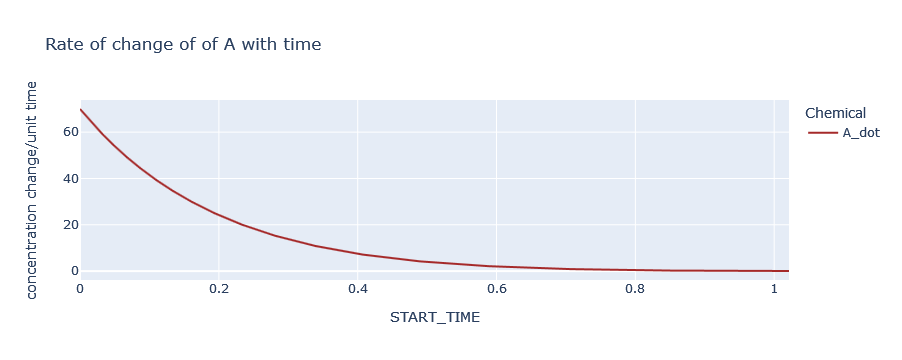

In [43]:
p1 = PlotlyHelper.plot_pandas(df=df, x_var="START_TIME", fields=["A_dot"], colors=['brown'], 
                              ylabel="concentration change/unit time",
                              title="Rate of change of of A with time")
p1

Let's create a combined plot like we had in experiment `react_2_a`:

In [44]:
p2 = dynamics.plot_history(chemicals="A", colors='darkturquoise')   # The plot of [A] vs. time that we saw earlier

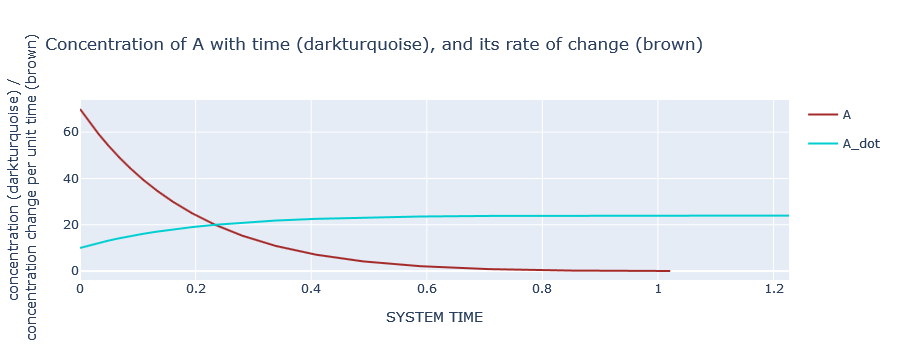

In [45]:
PlotlyHelper.combine_plots([p1, p2],
                           xlabel="SYSTEM TIME", 
                           ylabel="concentration (darkturquoise) /<br> concentration change per unit time (brown)",
                           curve_labels=["A", "A_dot"],
                           title="Concentration of A with time (darkturquoise), and its rate of change (brown)")

### Notice how much smoother the lines are, compared to what we had in experiment `react_2_a` !